# SIMPLE LINEAR REGRESSION FOR SALARY DATA

In [51]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [57]:
df= pd.read_csv('Salary_data.csv')
df.head(15)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [59]:
df_Salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA

In [60]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [61]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [62]:
df.Salary.info()

<class 'pandas.core.series.Series'>
RangeIndex: 30 entries, 0 to 29
Series name: Salary
Non-Null Count  Dtype  
--------------  -----  
30 non-null     float64
dtypes: float64(1)
memory usage: 368.0 bytes


In [63]:
df.dtypes


YearsExperience    float64
Salary             float64
dtype: object

In [64]:
df.corr()


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [65]:
df.shape


(30, 2)

In [66]:
df.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [67]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# DATA VISUALIZATION

Text(0.5, 1.0, 'YearsExperience Q-Q plot')

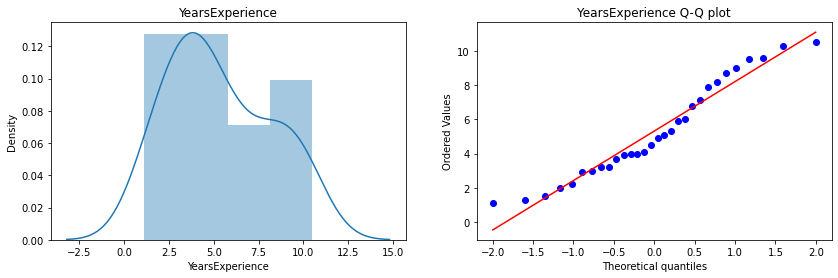

In [68]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['YearsExperience'])
plt.title('YearsExperience')

plt.subplot(122)
stats.probplot(df['YearsExperience'], dist = 'norm', plot=plt)
plt.title ('YearsExperience Q-Q plot')


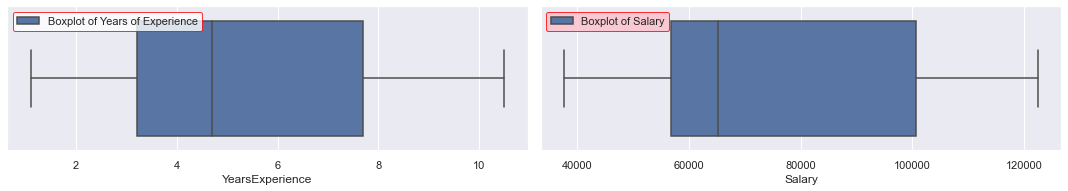

In [69]:
sns.set(rc={"figure.figsize": (15,5)})
#creating first plot
plt.subplot(2,2,1)
ax = sns.boxplot(x=df['YearsExperience'])
plt.legend(['Boxplot of Years of Experience'],loc='upper left',facecolor='WHITE',edgecolor='RED')

# Creating the second 
plt.subplot(2,2,2)
ax = sns.boxplot(x=df['Salary'])
plt.legend(["Boxplot of Salary"],loc='upper left',facecolor='PINK',edgecolor='RED')
plt.tight_layout() 
plt.show()

Text(0.5, 1.0, 'Salary Q-Q plot')

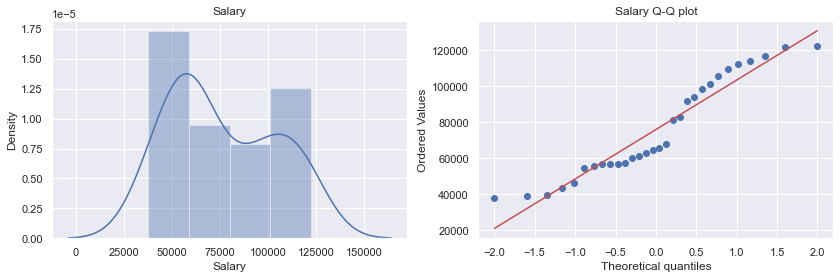

In [70]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Salary'])
plt.title('Salary')

plt.subplot(122)
stats.probplot(df['Salary'], dist = 'norm', plot=plt)
plt.title ('Salary Q-Q plot')


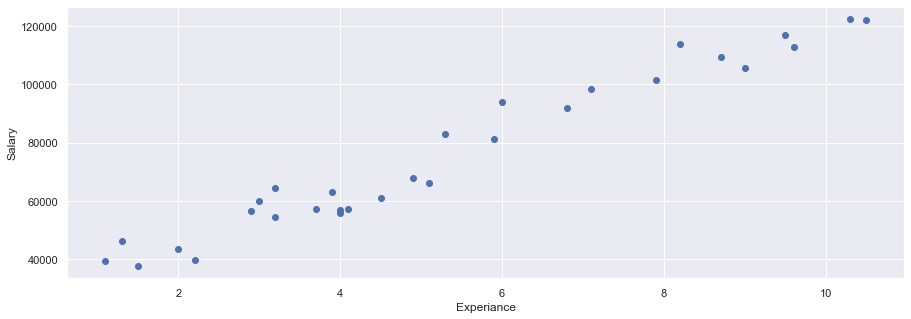

In [71]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel("Experiance")
plt.ylabel("Salary")
plt.show()

# MODEL FITTING AND VALIDATION

In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [89]:
x=df['YearsExperience']
y=df['Salary']

In [90]:
x=np.array(x)
y=np.array(y)

In [91]:
X = x.reshape(-1,1)

In [92]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [93]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [94]:
model.coef_

array([9449.96232146])

In [95]:
model.predict([[5]])


array([73042.01180594])

In [96]:
model.intercept_


25792.20019866871

In [97]:
y_pred = model.predict(X)
y_pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [98]:
from sklearn.metrics import mean_squared_error,r2_score


In [99]:
r2_score(y,y_pred)


0.9569566641435086

In [100]:
mean_squared_error(y,y_pred)


31270951.722280968

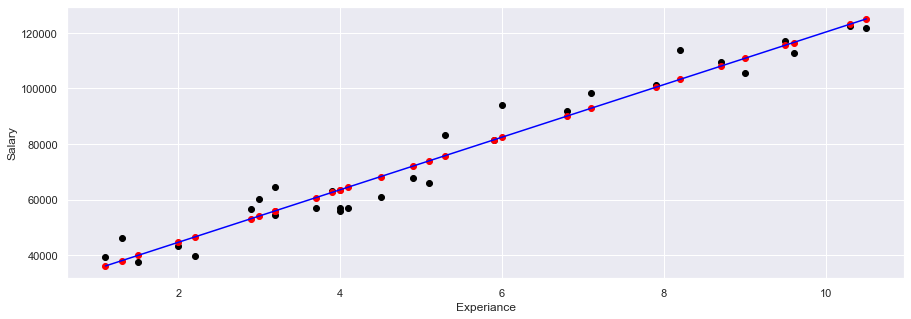

In [101]:
plt.scatter(x,y,color="black")
plt.scatter(x,y_pred,color="red")
plt.plot(x,y_pred,color="blue")
plt.xlabel("Experiance")
plt.ylabel("Salary")
plt.show()

In [102]:
df_Salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# TRANSFORMATION 

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [104]:
model = smf.ols('Salary ~ YearsExperience', data = df).fit()

In [142]:
Bo, B1 = model.params
print("Intercept, Bo: ", Bo)
print("YearsExperience, B1: ", B1)

tvalue, pvalue = (model.tvalues, model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

r_sq, r_sq_adj = (model.rsquared, model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)


Intercept, Bo:  25792.200198668703
YearsExperience, B1:  9449.962321455077
tvalue:  Intercept          11.346940
YearsExperience    24.950094
dtype: float64
pvalue:  Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64
R2:  0.9569566641435086
R2_Adj:  0.9554194021486339


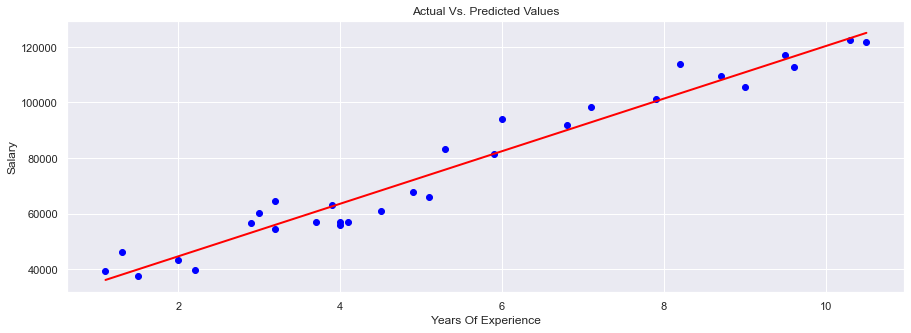

In [156]:
plt.scatter(data.YearsExperience, data.Salary,  color='blue')
plt.plot(data.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [188]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(data.Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data.Salary, predicted_salary))  
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(data.Salary, predicted_salary)))
print("R^2 Score :", metrics.r2_score(data.Salary, predicted_salary))

Mean Absolute Error: 75991.82602508513
Mean Squared Error: 6501238425.488393
Root Mean Squared Error: 80630.25750602805
R^2 Score : -7.948719933971136


p-value from the test: below 0.05 generally means non-normal: 0.010433139246046805
Residuals are not normally distributed


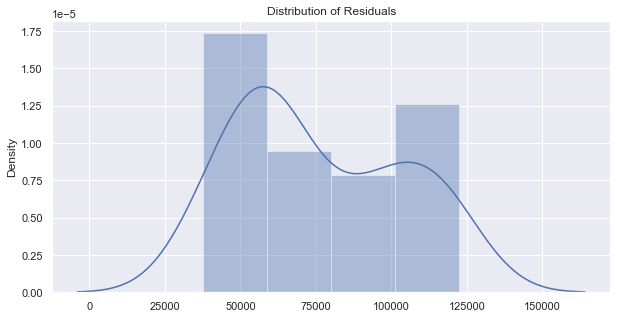

In [189]:
from statsmodels.stats.diagnostic import normal_ad
residuals = data.Salary - predicted_salary
p_value_thresh=0.05

p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

plt.subplots(figsize=(10,5))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()


In [201]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        11:39:39   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
data1 = pd.DataFrame.copy(data)
data1['log_YearsExperience'] = np.log(data1.YearsExperience)
data1.head()

,YearsExperience,Salary,log_YearsExperience
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


In [203]:
log_model = smf.ols('Salary ~ log_YearsExperience', data = data1).fit()

In [204]:
Bo, B1 = log_model.params
print("Intercept, Bo: ", Bo)
print("YearsExperience, B1: ", B1)


tvalue, pvalue = (log_model.tvalues, log_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

r_sq, r_sq_adj = (log_model.rsquared, log_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)


Intercept, Bo:  14927.97177005727
YearsExperience, B1:  40581.98795977906
tvalue:  Intercept               2.895135
log_YearsExperience    12.791989
dtype: float64
pvalue:  Intercept              7.268813e-03
log_YearsExperience    3.250155e-13
dtype: float64
R2:  0.8538888828756969
R2_Adj:  0.8486706286926861


In [205]:
predicted_salary = log_model.predict(data1.log_YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data.Salary, 'Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,Salary_Predicted
0,39343.0,18795.848339
1,46205.0,25575.235192
2,37731.0,31382.551905
3,43525.0,43057.262306
4,39891.0,46925.138875
5,56642.0,58136.050079
6,60150.0,59511.842441
7,54445.0,62130.943929
8,64445.0,62130.943929
9,57189.0,68022.718504


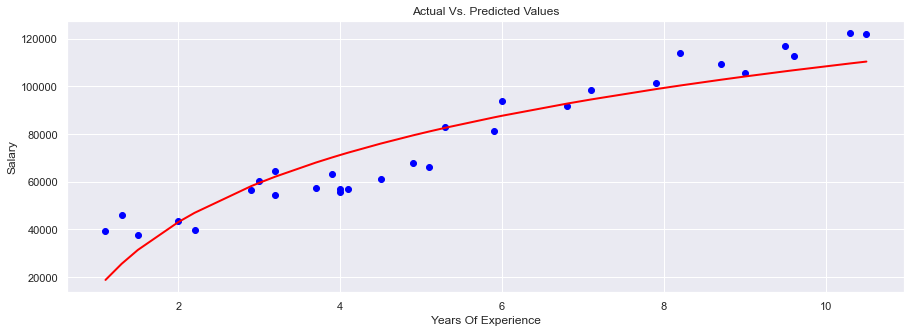

In [206]:
plt.scatter(data1.YearsExperience, data1.Salary,  color='blue')
plt.plot(data1.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [215]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.Salary, predicted_salary)))
print("R^2 Score :", metrics.r2_score(data1.Salary, predicted_salary))

Mean Absolute Error: 75991.82602508513
Mean Squared Error: 6501238425.488393
Root Mean Squared Error: 80630.25750602805
R^2 Score : -7.948719933971136


p-value from the test: below 0.05 generally means non-normal: 0.010433139246046805
Residuals are not normally distributed


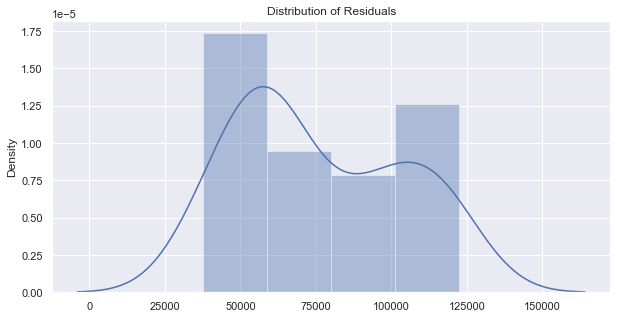

In [217]:
residuals = data1.Salary - predicted_salary
p_value_thresh=0.05

p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)


if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')


plt.subplots(figsize=(10,5))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [218]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           3.25e-13
Time:                        11:41:28   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_YearsExperience  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
data1['log_Salary'] = np.log(data1.Salary)
data1.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


In [210]:
exp_model = smf.ols('log_Salary ~ YearsExperience', data = data1).fit()

In [211]:
Bo, B1 = exp_model.params
print("Intercept, Bo: ", Bo)
print("YearsExperience, B1: ", B1)

tvalue, pvalue = (exp_model.tvalues, exp_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

r_sq, r_sq_adj = (exp_model.rsquared, exp_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)


Intercept, Bo:  10.507401896588272
YearsExperience, B1:  0.12545288926085646
tvalue:  Intercept          273.327166
YearsExperience     19.584833
dtype: float64
pvalue:  Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64
R2:  0.9319671194084195
R2_Adj:  0.9295373736730059


In [212]:
predicted_salary = exp_model.predict(data1.YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data1.log_Salary, 'Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,Salary_Predicted
0,10.580073,10.645400
1,10.740843,10.670491
2,10.538237,10.695581
3,10.681091,10.758308
4,10.593906,10.783398
5,10.944506,10.871215
6,11.004597,10.883761
7,10.904946,10.908851
8,11.073567,10.908851
9,10.954117,10.971578


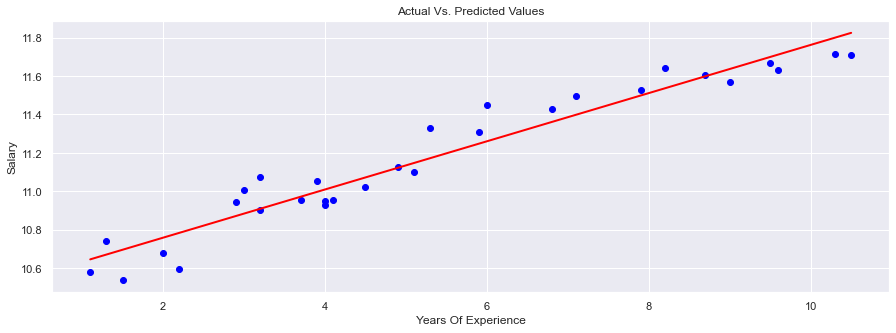

In [213]:
plt.scatter(data1.YearsExperience, data1.log_Salary,  color='blue')
plt.plot(data1.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [214]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.log_Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.log_Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.log_Salary, predicted_salary)))
print("R^2 Score :", metrics.r2_score(data1.log_Salary, predicted_salary))

Mean Absolute Error: 0.07981492426092208
Mean Squared Error: 0.00894431117203029
Root Mean Squared Error: 0.0945743684728071
R^2 Score : 0.9319671194084195


p-value from the test: below 0.05 generally means non-normal: 0.13649327468340658
Residuals are normally distributed


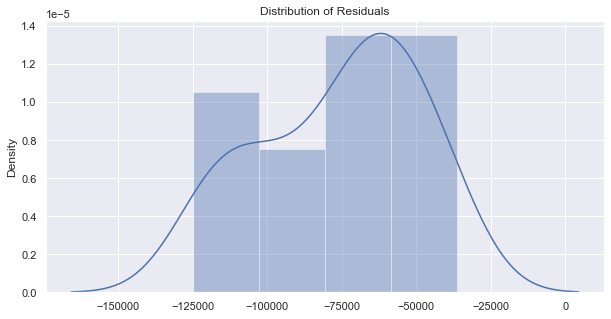

In [172]:
residuals = data1.log_Salary - predicted_salary
p_value_thresh=0.05
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)


if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')


plt.subplots(figsize=(10,5))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()


In [173]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           7.03e-18
Time:                        11:23:37   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
data1['sqrt_Salary'] = np.sqrt(data1.Salary)
data1.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary,sqrt_Salary
0,1.1,39343.0,0.095310,10.580073,198.350700
1,1.3,46205.0,0.262364,10.740843,214.953483
2,1.5,37731.0,0.405465,10.538237,194.244691
3,2.0,43525.0,0.693147,10.681091,208.626460
4,2.2,39891.0,0.788457,10.593906,199.727314


In [223]:
sqrt_model = smf.ols('sqrt_Salary ~ YearsExperience', data = data1).fit()

In [224]:
Bo, B1 = sqrt_model.params
print("Intercept, Bo: ", Bo)
print("YearsExperience, B1: ", B1)


tvalue, pvalue = (sqrt_model.tvalues, sqrt_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)


r_sq, r_sq_adj = (sqrt_model.rsquared, sqrt_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)


Intercept, Bo:  180.70022140543102
YearsExperience, B1:  17.056532050241962
tvalue:  Intercept          40.646251
YearsExperience    23.025247
dtype: float64
pvalue:  Intercept          1.920194e-26
YearsExperience    9.782891e-20
dtype: float64
R2:  0.9498353533865289
R2_Adj:  0.9480437588646192


In [225]:
predicted_salary = sqrt_model.predict(data1.YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data1.sqrt_Salary, 'Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,Salary_Predicted
0,198.350700,199.462407
1,214.953483,202.873713
2,194.244691,206.285019
3,208.626460,214.813286
4,199.727314,218.224592
5,237.995798,230.164164
6,245.254969,231.869818
7,233.334524,235.281124
8,253.860198,235.281124
9,239.142217,243.809390


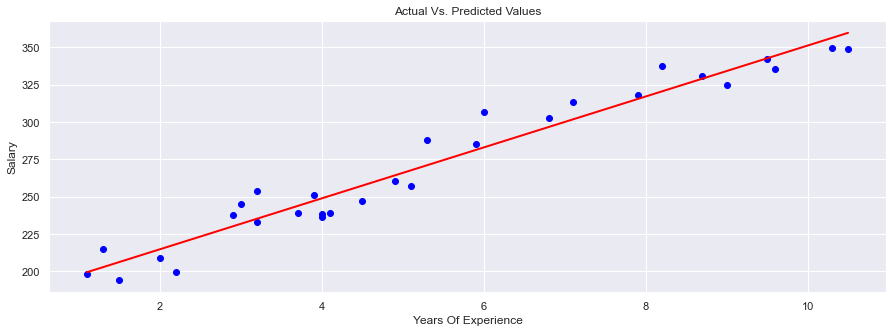

In [180]:
plt.scatter(data1.YearsExperience, data1.sqrt_Salary,  color='blue')
plt.plot(data1.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [226]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.sqrt_Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.sqrt_Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.sqrt_Salary, predicted_salary)))
print("R^2 Score :", metrics.r2_score(data1.sqrt_Salary, predicted_salary))

Mean Absolute Error: 9.321657712741537
Mean Squared Error: 119.61845560327352
Root Mean Squared Error: 10.937022245715399
R^2 Score : 0.9498353533865289


In [227]:
pred_df = pd.DataFrame({'Actual': (data1.sqrt_Salary)**2, 'Predicted': (predicted_salary)**2})
pred_df

,Actual,Predicted
0,39343.0,39785.251671
1,46205.0,41157.743455
2,37731.0,42553.509262
3,43525.0,46144.747630
4,39891.0,47621.972517
5,56642.0,52975.542551
6,60150.0,53763.612294
7,54445.0,55357.207295
8,64445.0,55357.207295
9,57189.0,59443.018648


p-value from the test: below 0.05 generally means non-normal: 0.11907877807581366
Residuals are normally distributed


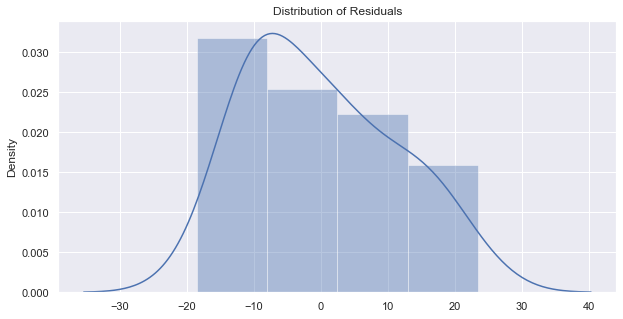

In [229]:
residuals = data1.sqrt_Salary - predicted_salary
p_value_thresh=0.05

p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)


if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

plt.subplots(figsize=(10,5))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [230]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqrt_Salary   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           9.78e-20
Time:                        11:50:28   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         180.7002      4.446     40.646      0.000     171.594     189.807
YearsExperience    17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# CONCLUSION

In [ ]:
#Simple linear Regression Model
Mean Absolute Error: 4644.20128944354
Mean Squared Error: 31270951.72228097
Root Mean Squared Error: 5592.043608760662
R^2 Score : 0.9569566641435086
    
    
#Logrithm Transformation Model
Mean Absolute Error: 8443.584664486356
Mean Squared Error: 106149618.72183888
Root Mean Squared Error: 10302.893706228308
R^2 Score : 0.8538888828756968
    
    
#Exponential Transformation Model
Mean Absolute Error: 0.07981492426092208
Mean Squared Error: 0.00894431117203029
Root Mean Squared Error: 0.0945743684728071
R^2 Score : 0.9319671194084195
    

#Square-root Transformation Model
Mean Absolute Error: 9.321657712741537
Mean Squared Error: 119.61845560327352
Root Mean Squared Error: 10.937022245715399
R^2 Score : 0.9498353533865289



